In [116]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

In [117]:
Boston=pd.read_csv("Boston.csv")
boston_crime=pd.DataFrame(Boston)
boston_crime

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192041836,3831.0,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,NaN,,NaN,2019-06-03 22:25:00,2019.0,6.0,Monday,22.0,Part Three,NaN,42.250092,-71.122460,"(42.25009238, -71.12246038)"
1,I192041835,3006.0,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,B2,315,NaN,2019-06-03 20:11:00,2019.0,6.0,Monday,20.0,Part Three,WABON ST,42.314412,-71.085304,"(42.31441222, -71.08530390)"
2,I192041832,3114.0,Investigate Property,INVESTIGATE PROPERTY,E13,906,NaN,2019-06-03 20:16:00,2019.0,6.0,Monday,20.0,Part Three,HEATH ST,42.326242,-71.103176,"(42.32624204, -71.10317575)"
3,I192041831,3501.0,Missing Person Reported,MISSING PERSON,B2,281,NaN,2019-06-03 21:17:00,2019.0,6.0,Monday,21.0,Part Three,GREENVILLE ST,42.326968,-71.080519,"(42.32696802, -71.08051941)"
4,I192041825,3301.0,Verbal Disputes,VERBAL DISPUTE,C11,333,NaN,2019-06-03 21:13:00,2019.0,6.0,Monday,21.0,Part Three,MOUNT EVERETT ST,42.310136,-71.070293,"(42.31013569, -71.07029310)"
5,I192041822,1107.0,Fraud,FRAUD - IMPERSONATION,A1,66,NaN,2017-01-01 09:00:00,2017.0,1.0,Sunday,9.0,Part Two,MYRTLE ST,42.359274,-71.068154,"(42.35927419, -71.06815383)"
6,I192041821,2608.0,Offenses Against Child / Family,CHINS,C11,354,NaN,2019-06-03 20:47:00,2019.0,6.0,Monday,20.0,Part Two,NEPONSET AVE,42.296689,-71.055558,"(42.29668913, -71.05555843)"
7,I192041818,619.0,Larceny,LARCENY ALL OTHERS,D4,151,NaN,2019-06-02 15:13:00,2019.0,6.0,Sunday,15.0,Part One,APPLETON ST,42.346452,-71.069861,"(42.34645150, -71.06986052)"
8,I192041817,3301.0,Verbal Disputes,VERBAL DISPUTE,C11,393,NaN,2019-06-03 20:28:00,2019.0,6.0,Monday,20.0,Part Three,MONSIGNOR PATRICK J. LYDO,42.288662,-71.061305,"(42.28866198, -71.06130524)"
9,I192041814,3208.0,Property Lost,PROPERTY - MISSING,NaN,,NaN,2019-06-01 14:00:00,2019.0,6.0,Saturday,14.0,Part Three,O'REILLY,-1.000000,-1.000000,"(-1.00000000, -1.00000000)"


In [118]:
boston_crime = boston_crime.rename(columns={
    "INCIDENT_NUMBER":"incident_number",
    "OFFENSE_CODE":"offense_code", 
    "OFFENSE_CODE_GROUP":"offense_code_group",
    "OFFENSE_DESCRIPTION":"description",
    "DISTRICT":"district", 
    "REPORTING_AREA":"report_from",
    "SHOOTING":"shooting",
    "OCCURED_ON_DATE":"occured_on date",
    "YEAR":"year",
    "MONTH":"month",
    "DAY_OF_WEEK":"day_of_week",
    "HOUR":"hour",
    "UCR_PART":"crime_classification",
    "STREET": "street",
})
#renaming the columns makes it easier to understand the column later on

incident_number-internal Boston Police Department number assigned to incident
<br>offense code- numerical code to categorize offense
<br>offense code group- internal BPD number assigned to offense code
<br>offense discription-discription of the offense committed
<br>district-district in which crime was reported in 
<br>reporting_area-number assosciated with the area in which the crime was reported
<br>shooting- indicates whether a shooting took place
<br>occured on- indicated the earliest time the crime could have occured
<br>crime classification-universal crime reporting number
<br>    Part 1= Serious crimes that occur regularly and are likely to be reported to the police(e.g homicide,rape,robbery,assalt 
<br>    Part 2= Moderate offenses that include drug abuse, embezzlement, fraud, gambling and so on. 
<br>    Part 3= no damage was dealt and mostly investigative and adminstritive duties.

In [119]:
report = pandas_profiling.ProfileReport(boston_crime)
report

Number of variables,17
Number of observations,263807
Total Missing (%),6.8%
Total size in memory,34.2 MiB
Average record size in memory,136.0 B
Numeric,6
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,0


From above, we can see in the warning section that there is a high cardinality, which is actually good in this case, because it means that there were no repeated offenses being reocrded. Shooting has such a high missing rate because they denoted the fact that was no shooting by adding a null to the data set, this means that there was only a shooting involved in .04% of crimes reported in Boston.


In [120]:
boston_crime["shooting"] = boston_crime.shooting.fillna(0) 
#All the missing values of shooting were turned into a 0, making it a binary variable, 0 indicates no shooting occured, Y means shooting was involved


In [121]:
boston_crime.shooting.value_counts(True)

0    0.995925
Y    0.004075
Name: shooting, dtype: float64

In [122]:
winter=['1','2','12']
fall=['10','9','11']
summer=['6','7','8']
spring=['3','4','5']

boston_crime.loc[boston_crime['month'].isin(winter),'season']='winter'
boston_crime.loc[boston_crime['month'].isin(fall),'season']='fall'
boston_crime.loc[boston_crime['month'].isin(summer),'season']='summer'
boston_crime.loc[boston_crime['month'].isin(spring),'season']='spring'
#this makes it easier to compare to other variables

Text(0.5, 1.0, 'Crime Per Month')

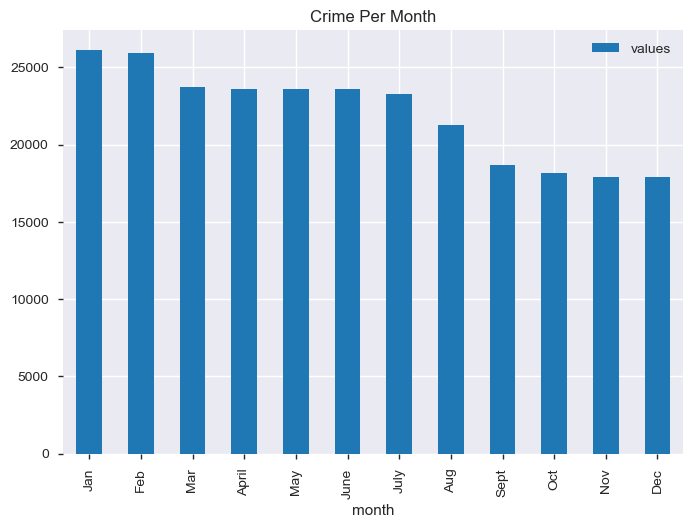

In [145]:
blue=pd.DataFrame(boston_crime.month.value_counts())
blue=blue.reset_index()
blue.columns=['month','values']
blue.month=blue.month.sort_values().values
blue
blue=blue.replace({'month': {1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June', 7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'}})
blue.plot.bar(x='month', y='values')
plt.title('Crime Per Month')


From the bar graph above, we can see that there is alot more crime when the year begins and it slowly tapers off.

Text(0.5, 1.0, 'Crime Per Year')

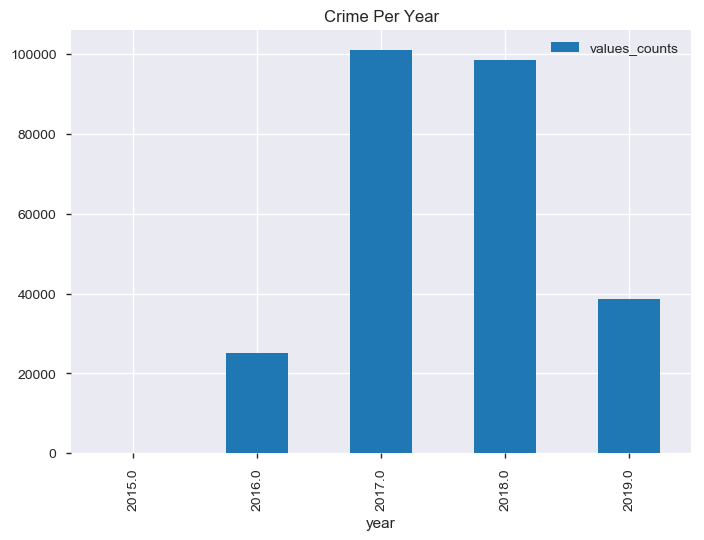

In [147]:
boston_crime.year.value_counts()
red={'year':[2015,2016,2017,2018,2019], 'values_counts':['116','25222','101128','98560','38780']}
red2=pd.DataFrame(red)
red2=red2.astype(float)
red2.plot.bar(x='year',y='values_counts')
plt.title('Crime Per Year')

It seems odd that there is so much crime in 2017 and 2018 but not in 2019, but it is likely that they started really tracking the data in 2017 whereas before, they were not fully committed.

In [125]:
def pivot_count(df, rows, columns):
    df_pivot = df.pivot_table(values="year", 
                              index=rows, 
                              columns=columns, 
                              aggfunc=np.size
                             ).dropna(axis=0, how='all')
    return df_pivot
#pivot tables are defined

In [126]:
day_of_month= pivot_count(boston_crime,"month","day_of_week")
day_of_month


day_of_week,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
1.0,3259.0,3535.0,3007.0,2949.0,3332.0,3917.0,3632.0
2.0,3338.0,3067.0,3057.0,2552.0,3092.0,3035.0,3150.0
3.0,4152.0,3132.0,3418.0,2854.0,3764.0,3007.0,3426.0
4.0,3309.0,3684.0,3491.0,3314.0,3281.0,3293.0,3239.0
5.0,3909.0,3509.0,3266.0,2875.0,4063.0,4060.0,4424.0
6.0,3103.0,2617.0,2851.0,2308.0,2868.0,2431.0,2514.0
7.0,2339.0,2985.0,2652.0,2542.0,2361.0,2626.0,2404.0
8.0,2796.0,2398.0,2216.0,2073.0,3060.0,2659.0,2978.0
9.0,3125.0,2313.0,2885.0,2372.0,2492.0,2311.0,2390.0


From this chart, it seems that in all months, the crime is pretty evenly spread out through the entire week.

In [127]:
shooting_per_month= pivot_count(boston_crime,"month","shooting")
shooting_per_month

shooting,0,Y
month,,
1.0,23543.0,88.0
2.0,21225.0,66.0
3.0,23709.0,44.0
4.0,23518.0,93.0
5.0,26014.0,92.0
6.0,18573.0,119.0
7.0,17820.0,89.0
8.0,18121.0,59.0
9.0,17809.0,79.0


There are more shooting in December, October, and June.

In [129]:
crime_by_season=pivot_count(boston_crime,"crime_classification","season")
crime_by_season

season,fall,spring,summer,winter
crime_classification,,,,
Other,264.0,277.0,246.0,276.0
Part One,12714.0,12105.0,10453.0,12402.0
Part Three,34626.0,38747.0,28097.0,35412.0
Part Two,19760.0,22322.0,15970.0,20056.0


In the summer time, there seems to be alot less crime not only in one type of UCR offense group but in all of them

In [131]:
district_year=pivot_count(boston_crime,"district","season")
district_year

season,fall,spring,summer,winter
district,,,,
A1,7706.0,8040.0,6407.0,7462.0
A15,1352.0,1531.0,1151.0,1442.0
A7,2538.0,2924.0,2113.0,2806.0
B2,10597.0,11639.0,8423.0,10654.0
B3,7672.0,8486.0,6295.0,7872.0
C11,8753.0,9543.0,7158.0,9129.0
C6,4978.0,5564.0,4128.0,4964.0
D14,4535.0,4586.0,3388.0,4238.0
D4,8639.0,9464.0,7021.0,8539.0


<br>A1=Downtown
<br>A15=Charlestown
<br>A7=East Boston
<br>B2=Roxbury
<br>B3=Mattapan
<br>C11=Dorchester
<br>C6=South Boston
<br>D14=Brighton
<br>D4=South End
<br>E13=Jamaica Plain
<br>E18=Hyde Park
<br>E5=West Roxbury


Above, we can see how often crime occurs during each season. It seems that each district remains has the same amount of crime in proportion to other district during each season.

In [132]:
district_shooting=pivot_count(boston_crime,"district","shooting")
district_shooting

shooting,0,Y
district,,
A1,29596.0,19.0
A15,5471.0,5.0
A7,10356.0,25.0
B2,40975.0,338.0
B3,30083.0,242.0
C11,34385.0,198.0
C6,19594.0,40.0
D14,16728.0,19.0
D4,33586.0,77.0


<br>A1=Downtown
<br>A15=Charlestown
<br>A7=East Boston
<br>B2=Roxbury
<br>B3=Mattapan
<br>C11=Dorchester
<br>C6=South Boston
<br>D14=Brighton
<br>D4=South End
<br>E13=Jamaica Plain
<br>E18=Hyde Park
<br>E5=West Roxbury

Roxbury and Mattapan have the most shooting, which makes sense since gangs are run in those areas.

In [133]:
district_crime=pivot_count(boston_crime,"district","crime_classification")
district_crime

crime_classification,Other,Part One,Part Three,Part Two
district,,,,
A1,59.0,6903.0,13567.0,9083.0
A15,19.0,921.0,3020.0,1516.0
A7,68.0,1570.0,5584.0,3156.0
B2,206.0,6596.0,21056.0,13441.0
B3,133.0,3863.0,16968.0,9351.0
C11,170.0,5480.0,18649.0,10269.0
C6,111.0,3830.0,9930.0,5758.0
D14,42.0,2890.0,9366.0,4443.0
D4,127.0,9286.0,14821.0,9422.0


<br>A1=Downtown
<br>A15=Charlestown
<br>A7=East Boston
<br>B2=Roxbury
<br>B3=Mattapan
<br>C11=Dorchester
<br>C6=South Boston
<br>D14=Brighton
<br>D4=South End
<br>E13=Jamaica Plain
<br>E18=Hyde Park
<br>E5=West Roxbury

From this chart, it is important to take away the fact that the South End consist of the most Part 1 crimes, which means it has the most serious offenses.

In [134]:
boston_crime.district.value_counts(True)

B2     0.157552
C11    0.131886
D4     0.128378
B3     0.115648
A1     0.112940
C6     0.074877
D14    0.063867
E18    0.056541
E13    0.054771
E5     0.043067
A7     0.039589
A15    0.020883
Name: district, dtype: float64

<br>A1=Downtown
<br>A15=Charlestown
<br>A7=East Boston
<br>B2=Roxbury
<br>B3=Mattapan
<br>C11=Dorchester
<br>C6=South Boston
<br>D14=Brighton
<br>D4=South End
<br>E13=Jamaica Plain
<br>E18=Hyde Park
<br>E5=West Roxbury

Roxbury,Dorchester, South End, Mattapan, and Downtown have the most amount of crimes, as the drop off afterwards is pretty dramatic. The chart depicts the percent of crime that the city is responsible for.

# Map

In [139]:
import cartopy.crs as ccrs
from cartopy.io import img_tiles

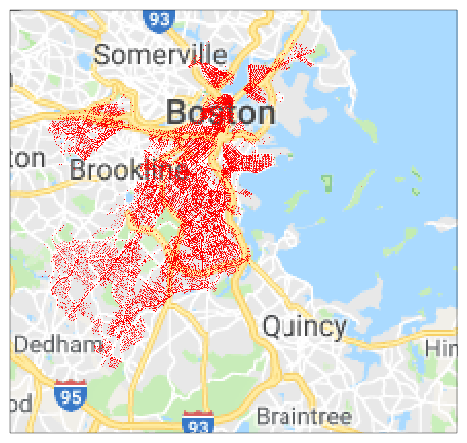

In [141]:
imagery = img_tiles.GoogleTiles()

ax = plt.axes(projection=imagery.crs)

maps_limits = (-71.2 ,-70.9,42.2 , 42.41)
ax.set_extent(maps_limits)

ax.add_image(imagery, 10)

plt.plot(boston_crime.Long, boston_crime.Lat, transform=ccrs.Geodetic(), 
         marker='.', markersize=1.5, color="red",  linewidth=0, alpha=0.5)


plt.show();

The map plots a point where all the crimes occur, so the more densely populalted the points are within each section, the more crime there is that occurs there.
From this map, we can draw the conclusion that downtown has alot of crime.

# Conclusion

From this, we can conlcude that the most dangerous city in Boston is the South End because they conatin the most Part1 UCR rated crimes. However, Mattapan, Roxbury and Dorchester contain more crimes overall meaning if one was to enter those areas, something is liekly to happen, alb